# Decision Tree and GraphViz

This example shows how to use decision tree package from scikit-learn, and how to display the resulting decision tree in a nice figure using package GraphViz. I just copy and paste from the tutorial webpage:
http://scikit-learn.org/stable/modules/tree.html

To be able to display the decision tree in graphic model, we need to run this program in Python 2.7.

How to get GraphViz and pydot to work, please refer to:
https://sites.google.com/site/kittipat/programming-with-python/displaydecisiontreeinpythonusingpydotandgraphviz

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()
print(iris.feature_names)
iris.data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Train a decision tree model from training dataset

In [4]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

Now, we will display the resulting decision tree

In [5]:
from sklearn.externals.six import StringIO  

## This package will need package pydot which only works for python2.7
import pydot 

In [6]:
## Extract the decision tree logic from the trained model
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 

## convert the logics into graph
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

## This will plot decision tree in pdf file
graph.write_pdf(path="iris.pdf") 

True

We can display the decision tree in this notebook

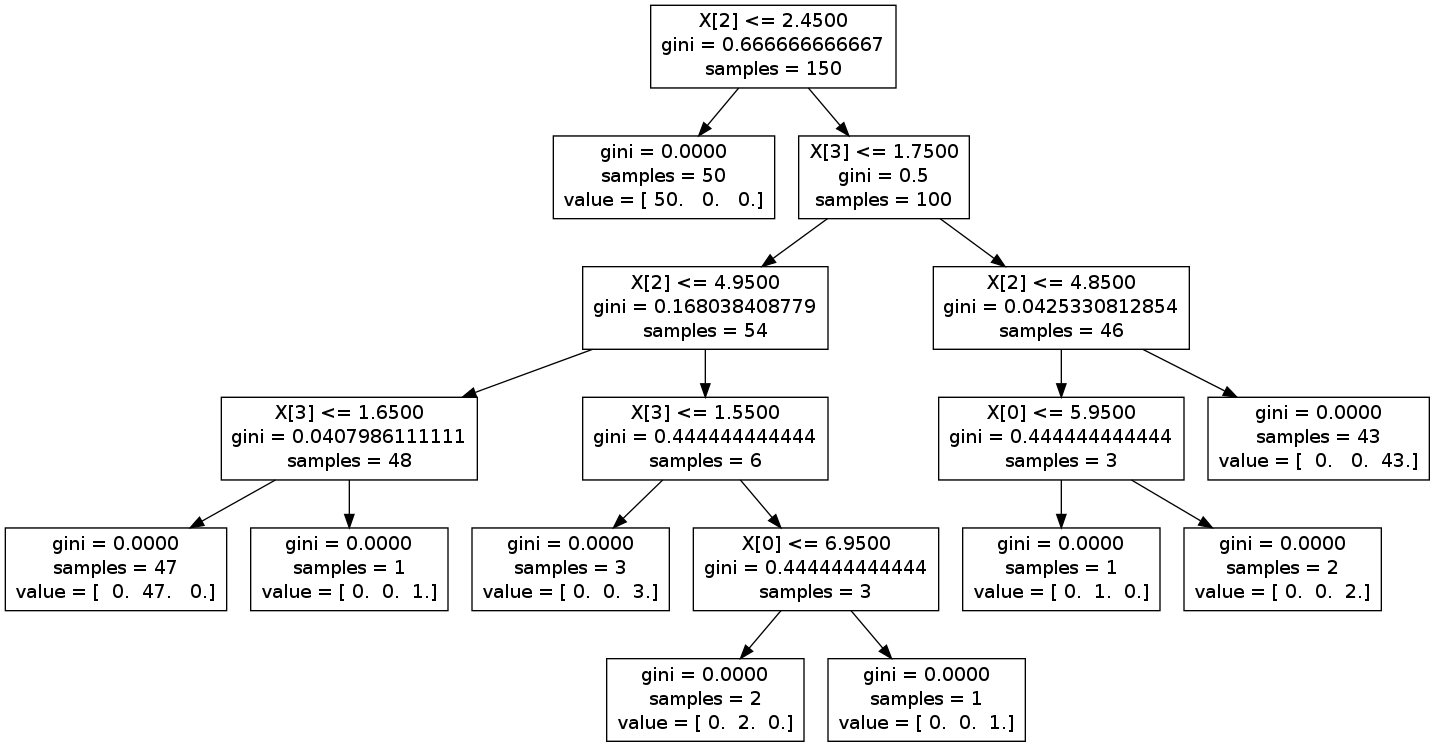

In [7]:
from IPython.display import Image #needed to render in notebook
Image(graph.create_png())

In fact, we can get the decision tree in text mode in depth-first-search order starting with the left.

In [25]:
dot_data.getvalue()

'digraph Tree {\n0 [label="X[2] <= 2.4500\\ngini = 0.666666666667\\nsamples = 150", shape="box"] ;\n1 [label="gini = 0.0000\\nsamples = 50\\nvalue = [ 50.   0.   0.]", shape="box"] ;\n0 -> 1 ;\n2 [label="X[3] <= 1.7500\\ngini = 0.5\\nsamples = 100", shape="box"] ;\n0 -> 2 ;\n3 [label="X[2] <= 4.9500\\ngini = 0.168038408779\\nsamples = 54", shape="box"] ;\n2 -> 3 ;\n4 [label="X[3] <= 1.6500\\ngini = 0.0407986111111\\nsamples = 48", shape="box"] ;\n3 -> 4 ;\n5 [label="gini = 0.0000\\nsamples = 47\\nvalue = [  0.  47.   0.]", shape="box"] ;\n4 -> 5 ;\n6 [label="gini = 0.0000\\nsamples = 1\\nvalue = [ 0.  0.  1.]", shape="box"] ;\n4 -> 6 ;\n7 [label="X[3] <= 1.5500\\ngini = 0.444444444444\\nsamples = 6", shape="box"] ;\n3 -> 7 ;\n8 [label="gini = 0.0000\\nsamples = 3\\nvalue = [ 0.  0.  3.]", shape="box"] ;\n7 -> 8 ;\n9 [label="X[0] <= 6.9500\\ngini = 0.444444444444\\nsamples = 3", shape="box"] ;\n7 -> 9 ;\n10 [label="gini = 0.0000\\nsamples = 2\\nvalue = [ 0.  2.  0.]", shape="box"] ;\n9 